In [39]:
!pip install wordcloud

In [40]:
!pip install konlpy

In [25]:
import pandas as pd
import re
import numpy as np

In [74]:
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
from wordcloud import WordCloud

In [76]:
#청와대 국민청원 크롤링 csv 파일 불러오기
petition = pd.read_csv('finish_petition.csv')

In [132]:
#16가지 category의 title들을 WordCloud
p = petition.groupby('category').get_group('안전/환경')

In [133]:
#정규표현식으로 한글, 알파벳, 숫자, 마침표와 쉼표를 제외한 다른 기호들을 삭제 처리
p['title'] = p['title'].str.findall(r'[ㄱ-ㅣ 가-힣A-Za-z0-9\.\,]+')

p = p['title'].tolist()
p = sum(p, [])
result = " ".join(p)

C:\Users\82104\AppData\Local\Temp/ipykernel_29888/4289516367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['title'] = p['title'].str.findall(r'[ㄱ-ㅣ 가-힣A-Za-z0-9\.\,]+')


In [137]:
#가져온 title들을 txt 파일을 만들어 저장
myText = open(r'C:\Users\82104\Documents\GitHub\skku.cla3109.hw\cla3109_project\안전환경.txt', 'w')
myText.write(result)
myText.close()

In [138]:
with open('안전환경.txt', 'r') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

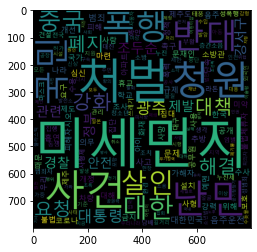

In [139]:
#WordCloud
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [140]:
#WordCloud 결과를 png 파일로 저장
wc.to_file('안전환경.png')

In [54]:
import matplotlib.pyplot as plt

In [2]:
print(os.environ.get('JAVA_HOME'))

C:\Program Files\Java\jdk-18.0.1.1


In [ ]:
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk18.0.0.1'